In [6]:
import pandas as pd


In [7]:
data = pd.read_csv("traindata.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 13 columns):
deadlift      86 non-null int64
benchpress    86 non-null int64
squat         86 non-null int64
pushup        86 non-null int64
situp         86 non-null int64
legpress      86 non-null int64
raw           86 non-null int64
rdl           86 non-null int64
lastpull      86 non-null int64
fly           86 non-null int64
curl          86 non-null int64
quality       86 non-null int64
passy         86 non-null int64
dtypes: int64(13)
memory usage: 8.8 KB


In [9]:
data.head()

deadlift  benchpress  squat  pushup  situp  legpress  raw  rdl  lastpull  \
0      1648         660   1650      60    100      5660  500  300       500   
1      1649         500   1651      61    101      5661  501  301       501   
2      1650         505   1652      62    102      5662  502  302       502   
3      1700         555   1653      63    103      5663  503  303       503   
4      1111         355   1654      64    104      5664  504  304       504   

   fly  curl  quality  passy  
0  200   300        6      0  
1  500    55        5      0  
2  300     0        4      0  
3  555   250        6      0  
4  633   123        2      0

In [10]:
data.describe()


deadlift  benchpress        squat      pushup       situp  \
count    86.000000   86.000000    86.000000   86.000000   86.000000   
mean   1763.604651  543.790698  1658.104651   82.965116  297.662791   
std     357.589192  149.983067   724.112845   38.442760  211.644519   
min    1111.000000  346.000000  1102.000000    9.000000  100.000000   
25%    1579.250000  390.250000  1123.250000   64.250000  121.250000   
50%    1600.500000  518.500000  1211.500000   93.500000  158.500000   
75%    2107.750000  623.500000  2146.500000  113.750000  556.750000   
max    3223.000000  849.000000  4521.000000  135.000000  611.000000   

          legpress          raw         rdl     lastpull         fly  \
count    86.000000    86.000000   86.000000    86.000000   86.000000   
mean   2322.755814   842.383721   57.162791   155.418605  110.697674   
std    1455.187143   308.458222   74.747553   209.893332  123.517855   
min    1111.000000   111.000000    0.000000     4.000000    0.000000   
25%    1207.250000   786.250000   22.000000    39.250000   45.250000   
50%    1668.500000   882.500000   29.500000    60.500000   64.500000   
75%    3123.750000   895.750000   43.250000   221.750000   84.750000   
max    5670.000000  1559.000000  304.000000  1151.000000  633.000000   

              curl    quality      passy  
count    86.000000  86.000000  86.000000  
mean    613.616279   5.325581   0.534884  
std     445.378680   2.166276   0.501707  
min       0.000000   1.000000   0.000000  
25%     138.750000   4.000000   0.000000  
50%     992.500000   5.000000   1.000000  
75%    1013.750000   7.000000   1.000000  
max    1035.000000  10.000000   1.000000

In [11]:
import numpy as np


In [12]:
np.any(data.isnull()==True)

False

In [13]:
import matplotlib.pyplot as plt

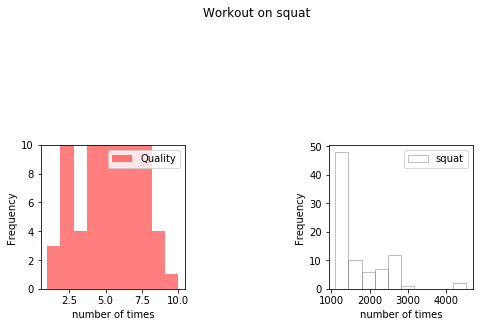

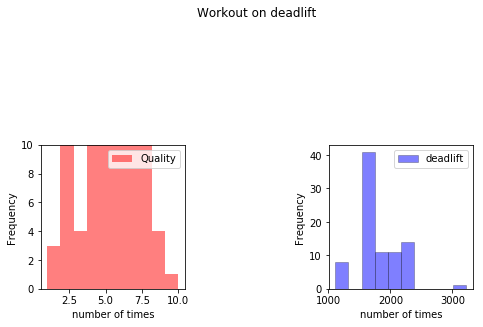

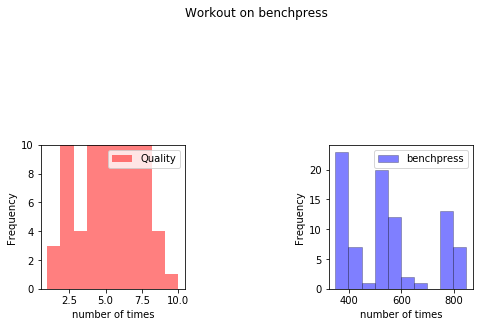

In [14]:
plt.figure(1)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.squat, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="squat")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on squat")

plt.show()
plt.figure(2)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.deadlift, 10, facecolor='blue', ec="black", lw=0.5, alpha=0.5, label="deadlift")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on deadlift")

plt.show()
plt.figure(3)
fig,ax = plt.subplots(1,2)

ax[0].hist(data.quality, 10, facecolor='red', alpha=0.5, label="Quality")
ax[1].hist(data.benchpress, 10, facecolor='blue', ec="black", lw=0.5, alpha=0.5, label="benchpress")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 10])
ax[0].set_xlabel("number of times")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("number of times")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Workout on benchpress")

plt.show()

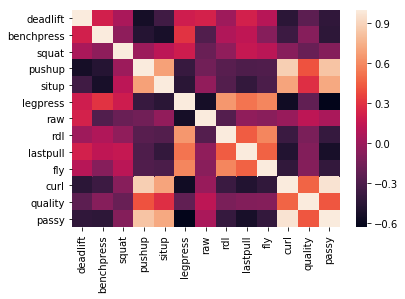

In [15]:
import seaborn as sns
%matplotlib inline

corr = data.corr() #计算协方差
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)
plt.show() #plt.show()

In [18]:
import numpy as np
from keras.utils import np_utils
#划分训练集合测试集
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:11]
dataY = np.ravel(data.quality)#降成一维，类似np.flatten(),但是np.flatten是拷贝，而ravel是引用
y = np_utils.to_categorical(dataY)
print (X)
print (y)
#X = data[:, 0:11]
#Y = data[:, 11]
#print(X)
#print(Y)
#随机划分训练集和测试集
#test_size:测试集占比
#random_state:随机种子，在需要重复试验的时候，保证得到一组一样的随机数。
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=33)

    deadlift  benchpress  squat  pushup  situp  legpress   raw  rdl  lastpull  \
0       1648         660   1650      60    100      5660   500  300       500   
1       1649         500   1651      61    101      5661   501  301       501   
2       1650         505   1652      62    102      5662   502  302       502   
3       1700         555   1653      63    103      5663   503  303       503   
4       1111         355   1654      64    104      5664   504  304       504   
5       2222         849   2000      65    105      5665   505  100       505   
6       2222         362   1222      66    106      5666   506  112       506   
7       2223         626   1212      67    107      5667   507  211         4   
8       2224         616   2600      68    108      5668   508  111      1151   
9       2225         800   2601      69    109      5669   509   66       222   
10      2226         801   2602      70    110      5670   111   77       251   
11      2112         802   2

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))#reshape input to be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[[-3.57187444e-01  8.21238857e-01  7.14380668e-02 -4.95856091e-01
  -8.98142772e-01  2.52783523e+00 -1.11526966e+00  3.18794456e+00
   1.72386883e+00  8.55891991e-01 -5.96584801e-01]
 [ 1.15229617e+00  5.07456552e-01  1.50204876e+00 -2.92702113e-01
  -8.60076678e-01  2.53374945e+00 -1.09043870e+00  6.80554128e-01
   4.97789267e+00  7.34194608e-02 -5.29189675e-01]
 [-5.06563426e-01 -1.17555763e+00  1.60445037e+00  1.12937573e+00
   1.26210805e+00 -4.25577252e-01 -2.18251102e-01 -6.32840860e-01
  -4.50478898e-01 -2.43086282e-01  1.02988422e+00]
 [ 3.77030680e+00 -2.12816468e-01 -6.87538554e-01  3.74231012e-02
  -7.98219275e-01 -7.64166218e-01  2.14689819e+00 -7.56429862e-02
   2.33368589e+00 -7.09053070e-01 -1.21886646e+00]
 [-5.53734789e-01  2.00805662e-01 -7.28198016e-01  6.72279282e-01
   1.32872372e+00 -8.24786949e-01  1.07655296e-01 -2.48108995e-01
  -5.40451907e-01 -4.01339153e-01  9.89447144e-01]
 [ 1.13657238e+00 -1.91422220e-01 -6.83020836e-01 -1.74017421e+00
  -7.83944490e-01 -

In [314]:
from keras.models import Sequential#MLP
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['accuracy'],optimizer='adam')
model.fit(X_train,y_train, nb_epoch=4500, batch_size=1, verbose=1)


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4500
57/57 [==============================] - 2s 36ms/step - loss: 25.6827 - acc: 0.0000e+00
Epoch 2/4500
57/57 [==============================] - 0s 5ms/step - loss: 11.5408 - acc: 0.1053
Epoch 3/4500
57/57 [==============================] - 0s 5ms/step - loss: 6.8775 - acc: 0.1053
Epoch 4/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.4665 - acc: 0.1404
Epoch 5/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.7111 - acc: 0.2807
Epoch 6/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.3027 - acc: 0.2982
Epoch 7/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.8761 - acc: 0.1930
Epoch 8/4500
57/57 [==============================] - 0s 4ms/step - loss: 3.6176 - acc: 0.1228
Epoch 9/4500
57/57 [==============================] - 0s 4ms/step - loss: 4.5837 - acc: 0.2105
Epoch 10/4500
57/57 [==============================] - 0s 5ms/step - loss: 4.6434 - acc: 0.2281
Epoch 11/4500
57/57 [=====================

57/57 [==============================] - 0s 5ms/step - loss: 0.8436 - acc: 0.4211
Epoch 171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8950 - acc: 0.3860
Epoch 172/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.1082 - acc: 0.4386
Epoch 173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9247 - acc: 0.4561
Epoch 174/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.8846 - acc: 0.4912
Epoch 175/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.0303 - acc: 0.3860
Epoch 176/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7869 - acc: 0.4386
Epoch 177/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8110 - acc: 0.4386
Epoch 178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.9249 - acc: 0.5263
Epoch 179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8003 - acc: 0.5088
Epoch 180/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6682 - acc: 0.5965
Epoch 339/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5894 - acc: 0.5614
Epoch 340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6376 - acc: 0.5965
Epoch 341/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.9141 - acc: 0.5789
Epoch 342/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7992 - acc: 0.5439
Epoch 343/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.8019 - acc: 0.4737
Epoch 344/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7254 - acc: 0.5614
Epoch 345/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7385 - acc: 0.5263
Epoch 346/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6294 - acc: 0.5789
Epoch 347/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8766 - acc: 0.4561
Epoch 348/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.4356 - acc: 0.6316
Epoch 507/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7630 - acc: 0.6316
Epoch 508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5426 - acc: 0.5614
Epoch 509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6991 - acc: 0.4912
Epoch 510/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5019 - acc: 0.6667
Epoch 511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7113 - acc: 0.5263
Epoch 512/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4972 - acc: 0.5439
Epoch 513/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6121 - acc: 0.6316
Epoch 514/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.8071 - acc: 0.5088
Epoch 515/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4931 - acc: 0.6491
Epoch 516/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.8689 - acc: 0.6140
Epoch 675/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6384 - acc: 0.7193
Epoch 676/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6218 - acc: 0.5789
Epoch 677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6170 - acc: 0.5965
Epoch 678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5517 - acc: 0.6140
Epoch 679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5944 - acc: 0.7018
Epoch 680/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4243 - acc: 0.6140
Epoch 681/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5152 - acc: 0.7018
Epoch 682/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4679 - acc: 0.6667
Epoch 683/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6218 - acc: 0.6140
Epoch 684/4500
57/57 [=======================

57/57 [==============================] - 0s 4ms/step - loss: 0.6191 - acc: 0.6140
Epoch 843/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6547 - acc: 0.5789
Epoch 844/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6925 - acc: 0.5965
Epoch 845/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6230 - acc: 0.7544
Epoch 846/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5942 - acc: 0.5614
Epoch 847/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6083 - acc: 0.6842
Epoch 848/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6901 - acc: 0.5263
Epoch 849/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6467 - acc: 0.6491
Epoch 850/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5462 - acc: 0.5614
Epoch 851/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4775 - acc: 0.6491
Epoch 852/4500
57/57 [=======================

57/57 [==============================] - 0s 5ms/step - loss: 0.5944 - acc: 0.7018
Epoch 1011/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5748 - acc: 0.6491
Epoch 1012/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5911 - acc: 0.6491
Epoch 1013/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4632 - acc: 0.6842
Epoch 1014/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4871 - acc: 0.5789
Epoch 1015/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5952 - acc: 0.6491
Epoch 1016/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4917 - acc: 0.7018
Epoch 1017/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5303 - acc: 0.7193
Epoch 1018/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6367 - acc: 0.6667
Epoch 1019/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5093 - acc: 0.6842
Epoch 1020/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4265 - acc: 0.7193
Epoch 1177/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5048 - acc: 0.5965
Epoch 1178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6747 - acc: 0.6491
Epoch 1179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4598 - acc: 0.6842
Epoch 1180/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5602 - acc: 0.6842
Epoch 1181/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6348 - acc: 0.6667
Epoch 1182/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5217 - acc: 0.6491
Epoch 1183/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3844 - acc: 0.7544
Epoch 1184/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5541 - acc: 0.6140
Epoch 1185/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5417 - acc: 0.6667
Epoch 1186/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3744 - acc: 0.7368
Epoch 1343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7435 - acc: 0.5965
Epoch 1344/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3986 - acc: 0.7368
Epoch 1345/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5997 - acc: 0.7193
Epoch 1346/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3895 - acc: 0.6316
Epoch 1347/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3551 - acc: 0.7719
Epoch 1348/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3166 - acc: 0.6842
Epoch 1349/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5160 - acc: 0.7018
Epoch 1350/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3131 - acc: 0.7544
Epoch 1351/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7119 - acc: 0.5789
Epoch 1352/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3197 - acc: 0.6667
Epoch 1509/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3963 - acc: 0.7193
Epoch 1510/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3817 - acc: 0.7719
Epoch 1511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6160 - acc: 0.6316
Epoch 1512/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4881 - acc: 0.7544
Epoch 1513/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.7193
Epoch 1514/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4234 - acc: 0.5965
Epoch 1515/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4250 - acc: 0.7544
Epoch 1516/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4593 - acc: 0.6842
Epoch 1517/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.7895
Epoch 1518/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4985 - acc: 0.6667
Epoch 1675/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5938 - acc: 0.6316
Epoch 1676/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6796 - acc: 0.6491
Epoch 1677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5342 - acc: 0.5965
Epoch 1678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4960 - acc: 0.6491
Epoch 1679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4161 - acc: 0.7193
Epoch 1680/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4369 - acc: 0.7368
Epoch 1681/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4373 - acc: 0.6667
Epoch 1682/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5229 - acc: 0.6491
Epoch 1683/4500
57/57 [==============================] - 0s 4ms/step - loss: 1.0388 - acc: 0.6316
Epoch 1684/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3957 - acc: 0.6491
Epoch 1841/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4702 - acc: 0.7193
Epoch 1842/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4319 - acc: 0.6491
Epoch 1843/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5032 - acc: 0.6842
Epoch 1844/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4164 - acc: 0.6842
Epoch 1845/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6074 - acc: 0.6667
Epoch 1846/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5516 - acc: 0.7018
Epoch 1847/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3589 - acc: 0.7368
Epoch 1848/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3641 - acc: 0.6667
Epoch 1849/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7318 - acc: 0.6491
Epoch 1850/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4127 - acc: 0.6842
Epoch 2007/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4920 - acc: 0.5965
Epoch 2008/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3614 - acc: 0.7193
Epoch 2009/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2390 - acc: 0.7719
Epoch 2010/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4715 - acc: 0.6667
Epoch 2011/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4152 - acc: 0.7895
Epoch 2012/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5466 - acc: 0.7193
Epoch 2013/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4141 - acc: 0.6842
Epoch 2014/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4208 - acc: 0.6316
Epoch 2015/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5415 - acc: 0.5965
Epoch 2016/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4061 - acc: 0.8070
Epoch 2173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4713 - acc: 0.6842
Epoch 2174/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4183 - acc: 0.7368
Epoch 2175/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4822 - acc: 0.7018
Epoch 2176/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5553 - acc: 0.5965
Epoch 2177/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4489 - acc: 0.7368
Epoch 2178/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4501 - acc: 0.7018
Epoch 2179/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3640 - acc: 0.6842
Epoch 2180/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5894 - acc: 0.6491
Epoch 2181/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6740 - acc: 0.7193
Epoch 2182/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.3295 - acc: 0.6316
Epoch 2339/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4874 - acc: 0.6491
Epoch 2340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.5213 - acc: 0.7368
Epoch 2341/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5003 - acc: 0.6667
Epoch 2342/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5633 - acc: 0.6842
Epoch 2343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4507 - acc: 0.6140
Epoch 2344/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4334 - acc: 0.6667
Epoch 2345/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5682 - acc: 0.6140
Epoch 2346/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6130 - acc: 0.7018
Epoch 2347/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4265 - acc: 0.7193
Epoch 2348/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2826 - acc: 0.7193
Epoch 2505/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4112 - acc: 0.7895
Epoch 2506/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2647 - acc: 0.7719
Epoch 2507/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2240 - acc: 0.8246
Epoch 2508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3446 - acc: 0.6316
Epoch 2509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4389 - acc: 0.6842
Epoch 2510/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3920 - acc: 0.7895
Epoch 2511/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3144 - acc: 0.7018
Epoch 2512/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.7389 - acc: 0.6491
Epoch 2513/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3703 - acc: 0.7719
Epoch 2514/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.4090 - acc: 0.7719
Epoch 2671/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3587 - acc: 0.7368
Epoch 2672/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3389 - acc: 0.7719
Epoch 2673/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2614 - acc: 0.7719
Epoch 2674/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3548 - acc: 0.7018
Epoch 2675/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2537 - acc: 0.7544
Epoch 2676/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4448 - acc: 0.6491
Epoch 2677/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3692 - acc: 0.7193
Epoch 2678/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4499 - acc: 0.7193
Epoch 2679/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2538 - acc: 0.7895
Epoch 2680/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2624 - acc: 0.7719
Epoch 2837/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2931 - acc: 0.7018
Epoch 2838/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3690 - acc: 0.7719
Epoch 2839/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2483 - acc: 0.7368
Epoch 2840/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3575 - acc: 0.7368
Epoch 2841/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3525 - acc: 0.7193
Epoch 2842/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3617 - acc: 0.7544
Epoch 2843/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2967 - acc: 0.6842
Epoch 2844/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4046 - acc: 0.8070
Epoch 2845/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.4694 - acc: 0.7544
Epoch 2846/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2747 - acc: 0.7895
Epoch 3003/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3982 - acc: 0.7368
Epoch 3004/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3562 - acc: 0.6842
Epoch 3005/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6332 - acc: 0.6667
Epoch 3006/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2863 - acc: 0.7544
Epoch 3007/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3064 - acc: 0.7018
Epoch 3008/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3468 - acc: 0.7719
Epoch 3009/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2858 - acc: 0.7193
Epoch 3010/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2970 - acc: 0.6667
Epoch 3011/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3100 - acc: 0.7018
Epoch 3012/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2386 - acc: 0.8070
Epoch 3169/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3049 - acc: 0.7368
Epoch 3170/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5311 - acc: 0.6667
Epoch 3171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3270 - acc: 0.7018
Epoch 3172/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2437 - acc: 0.7018
Epoch 3173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3622 - acc: 0.7719
Epoch 3174/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4789 - acc: 0.7368
Epoch 3175/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3295 - acc: 0.7193
Epoch 3176/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2816 - acc: 0.7193
Epoch 3177/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3928 - acc: 0.7544
Epoch 3178/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.2180 - acc: 0.7895
Epoch 3335/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2359 - acc: 0.7368
Epoch 3336/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1592 - acc: 0.7895
Epoch 3337/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.7544
Epoch 3338/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2408 - acc: 0.7544
Epoch 3339/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1932 - acc: 0.8070
Epoch 3340/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3156 - acc: 0.6491
Epoch 3341/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3029 - acc: 0.7719
Epoch 3342/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2314 - acc: 0.7895
Epoch 3343/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.5401 - acc: 0.7193
Epoch 3344/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3611 - acc: 0.6491
Epoch 3501/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3351 - acc: 0.6491
Epoch 3502/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3270 - acc: 0.7895
Epoch 3503/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3135 - acc: 0.7544
Epoch 3504/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2594 - acc: 0.7719
Epoch 3505/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2646 - acc: 0.6842
Epoch 3506/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2981 - acc: 0.7895
Epoch 3507/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.7504 - acc: 0.6667
Epoch 3508/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3226 - acc: 0.7193
Epoch 3509/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2822 - acc: 0.7368
Epoch 3510/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.4335 - acc: 0.7544
Epoch 3667/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4530 - acc: 0.6842
Epoch 3668/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4837 - acc: 0.6140
Epoch 3669/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2829 - acc: 0.6842
Epoch 3670/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2765 - acc: 0.8070
Epoch 3671/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1978 - acc: 0.7368
Epoch 3672/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2764 - acc: 0.6842
Epoch 3673/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2669 - acc: 0.7193
Epoch 3674/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3500 - acc: 0.7193
Epoch 3675/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3327 - acc: 0.7544
Epoch 3676/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2124 - acc: 0.7193
Epoch 3833/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3254 - acc: 0.7719
Epoch 3834/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2418 - acc: 0.7018
Epoch 3835/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4745 - acc: 0.7368
Epoch 3836/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3076 - acc: 0.7544
Epoch 3837/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2203 - acc: 0.7719
Epoch 3838/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1770 - acc: 0.8246
Epoch 3839/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4468 - acc: 0.8070
Epoch 3840/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2902 - acc: 0.8070
Epoch 3841/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2820 - acc: 0.7895
Epoch 3842/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2733 - acc: 0.7719
Epoch 3999/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1736 - acc: 0.8596
Epoch 4000/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3930 - acc: 0.7368
Epoch 4001/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2691 - acc: 0.7544
Epoch 4002/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1853 - acc: 0.8070
Epoch 4003/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.2115 - acc: 0.8070
Epoch 4004/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3246 - acc: 0.8421
Epoch 4005/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3874 - acc: 0.7719
Epoch 4006/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2640 - acc: 0.7895
Epoch 4007/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1557 - acc: 0.8421
Epoch 4008/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.5903 - acc: 0.7368
Epoch 4165/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2171 - acc: 0.7719
Epoch 4166/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1807 - acc: 0.8246
Epoch 4167/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3639 - acc: 0.7719
Epoch 4168/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3666 - acc: 0.7719
Epoch 4169/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1502 - acc: 0.8421
Epoch 4170/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1648 - acc: 0.8070
Epoch 4171/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1800 - acc: 0.7895
Epoch 4172/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1047 - acc: 0.8596
Epoch 4173/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2034 - acc: 0.8246
Epoch 4174/4500
57/57 [=============

57/57 [==============================] - 0s 4ms/step - loss: 0.3080 - acc: 0.7895
Epoch 4331/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.1960 - acc: 0.7719
Epoch 4332/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1913 - acc: 0.7544
Epoch 4333/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.3011 - acc: 0.7719
Epoch 4334/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2972 - acc: 0.7368
Epoch 4335/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.6538 - acc: 0.7368
Epoch 4336/4500
57/57 [==============================] - 0s 5ms/step - loss: 0.3415 - acc: 0.7544
Epoch 4337/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.6026 - acc: 0.7719
Epoch 4338/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.4355 - acc: 0.7018
Epoch 4339/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1966 - acc: 0.8421
Epoch 4340/4500
57/57 [=============

57/57 [==============================] - 0s 5ms/step - loss: 0.2188 - acc: 0.7544
Epoch 4497/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2652 - acc: 0.7895
Epoch 4498/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2681 - acc: 0.7719
Epoch 4499/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.2061 - acc: 0.8246
Epoch 4500/4500
57/57 [==============================] - 0s 4ms/step - loss: 0.1920 - acc: 0.7719


In [49]:
# create and fit the model
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


#y = np_utils.to_categorical(dataY)

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(11, activation='softmax'))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 64)                19456     
_________________________________________________________________
dense_8 (Dense)              (None, 11)                715       
Total params: 20,171
Trainable params: 20,171
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, epochs=600, batch_size=1, validation_data=(X_test, y_test), verbose=2, shuffle=False)
#model.get_weights()

Train on 57 samples, validate on 29 samples
Epoch 1/600
 - 2s - loss: 0.1645 - acc: 0.1754 - val_loss: 0.1645 - val_acc: 0.1379
Epoch 2/600
 - 0s - loss: 0.1629 - acc: 0.3509 - val_loss: 0.1637 - val_acc: 0.1724
Epoch 3/600
 - 0s - loss: 0.1610 - acc: 0.3684 - val_loss: 0.1628 - val_acc: 0.2414
Epoch 4/600
 - 0s - loss: 0.1585 - acc: 0.3860 - val_loss: 0.1617 - val_acc: 0.2414
Epoch 5/600
 - 0s - loss: 0.1549 - acc: 0.3860 - val_loss: 0.1602 - val_acc: 0.2414
Epoch 6/600
 - 0s - loss: 0.1500 - acc: 0.3860 - val_loss: 0.1581 - val_acc: 0.2069
Epoch 7/600
 - 0s - loss: 0.1441 - acc: 0.3684 - val_loss: 0.1552 - val_acc: 0.2069
Epoch 8/600
 - 0s - loss: 0.1378 - acc: 0.3333 - val_loss: 0.1521 - val_acc: 0.1724
Epoch 9/600
 - 0s - loss: 0.1321 - acc: 0.3158 - val_loss: 0.1492 - val_acc: 0.1724
Epoch 10/600
 - 0s - loss: 0.1276 - acc: 0.3509 - val_loss: 0.1470 - val_acc: 0.2069
Epoch 11/600
 - 0s - loss: 0.1241 - acc: 0.4035 - val_loss: 0.1454 - val_acc: 0.2069
Epoch 12/600
 - 0s - loss: 0.1

Epoch 97/600
 - 0s - loss: 0.0689 - acc: 0.6316 - val_loss: 0.1268 - val_acc: 0.3103
Epoch 98/600
 - 0s - loss: 0.0689 - acc: 0.6316 - val_loss: 0.1267 - val_acc: 0.3103
Epoch 99/600
 - 0s - loss: 0.0688 - acc: 0.6316 - val_loss: 0.1267 - val_acc: 0.3103
Epoch 100/600
 - 0s - loss: 0.0687 - acc: 0.6316 - val_loss: 0.1267 - val_acc: 0.3103
Epoch 101/600
 - 0s - loss: 0.0686 - acc: 0.6316 - val_loss: 0.1266 - val_acc: 0.3103
Epoch 102/600
 - 0s - loss: 0.0686 - acc: 0.6316 - val_loss: 0.1266 - val_acc: 0.3103
Epoch 103/600
 - 0s - loss: 0.0685 - acc: 0.6316 - val_loss: 0.1266 - val_acc: 0.3103
Epoch 104/600
 - 0s - loss: 0.0685 - acc: 0.6316 - val_loss: 0.1266 - val_acc: 0.3103
Epoch 105/600
 - 0s - loss: 0.0684 - acc: 0.6316 - val_loss: 0.1265 - val_acc: 0.3103
Epoch 106/600
 - 0s - loss: 0.0683 - acc: 0.6316 - val_loss: 0.1265 - val_acc: 0.3103
Epoch 107/600
 - 0s - loss: 0.0683 - acc: 0.6316 - val_loss: 0.1265 - val_acc: 0.3103
Epoch 108/600
 - 0s - loss: 0.0682 - acc: 0.6316 - val_lo

Epoch 193/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 194/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 195/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 196/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 197/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 198/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 199/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 200/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 201/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 202/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 203/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val_loss: 0.1255 - val_acc: 0.3103
Epoch 204/600
 - 0s - loss: 0.0639 - acc: 0.6491 - val

Epoch 289/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1251 - val_acc: 0.3103
Epoch 290/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1251 - val_acc: 0.3103
Epoch 291/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1251 - val_acc: 0.3103
Epoch 292/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1251 - val_acc: 0.3103
Epoch 293/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1251 - val_acc: 0.3103
Epoch 294/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 295/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 296/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 297/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 298/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 299/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val_loss: 0.1250 - val_acc: 0.3103
Epoch 300/600
 - 0s - loss: 0.0638 - acc: 0.6491 - val

Epoch 385/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1202 - val_acc: 0.3448
Epoch 386/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1202 - val_acc: 0.3448
Epoch 387/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1202 - val_acc: 0.3448
Epoch 388/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1202 - val_acc: 0.3448
Epoch 389/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 390/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 391/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 392/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 393/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 394/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 395/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1201 - val_acc: 0.3448
Epoch 396/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val

Epoch 481/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 482/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 483/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 484/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 485/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 486/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 487/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 488/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 489/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 490/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 491/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val_loss: 0.1195 - val_acc: 0.3448
Epoch 492/600
 - 0s - loss: 0.0606 - acc: 0.6667 - val

Epoch 577/600
 - 0s - loss: 0.0597 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 578/600
 - 0s - loss: 0.0597 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 579/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 580/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 581/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 582/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 583/600
 - 1s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 584/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 585/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 586/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 587/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val_loss: 0.1191 - val_acc: 0.3448
Epoch 588/600
 - 0s - loss: 0.0596 - acc: 0.6842 - val

In [318]:
#score = model.evaluate(X_test, y_test, batch_size=16)

In [319]:
#y_pred = model.predict(X_test)
#print (y_pred[:10])

In [320]:
#print (y_test[:10])

In [46]:
score = model.evaluate(X_test,y_test,verbose=1)
print (score)

29/29 [==============================] - 0s 146us/step
[0.1260785609483719, 0.3103448152542114]


In [47]:
y_pred = model.predict(X_test)
print (y_pred[:10])

[[8.40893364e-08 1.08827828e-06 1.73884895e-09 5.61647369e-07
  1.24762025e-07 5.51154544e-09 9.99890804e-01 3.64819903e-06
  2.86312314e-07 1.03319413e-04 9.19806737e-08]
 [1.99246220e-09 1.32961745e-07 2.33744672e-07 5.86667026e-09
  9.86881137e-01 1.31184626e-02 4.11300789e-08 2.96166889e-12
  2.82279444e-09 6.53593291e-10 2.57355848e-09]
 [1.11318322e-07 1.43319789e-09 4.28698899e-09 2.13561947e-07
  8.29175812e-13 3.29382556e-06 7.97171611e-03 9.92017269e-01
  1.48501749e-06 5.66803283e-06 1.81086307e-07]
 [1.20934533e-06 3.76535354e-07 8.18150809e-08 6.35141168e-06
  4.61067584e-09 9.98145461e-01 2.54747312e-04 1.57302432e-03
  5.68461155e-06 1.08629629e-05 2.21308869e-06]
 [3.91459976e-09 4.66160586e-08 7.77113573e-09 2.05109583e-08
  4.82012638e-07 4.26308072e-10 9.99998331e-01 9.98556288e-07
  1.32516123e-08 1.53696263e-07 5.17991294e-09]
 [1.16491305e-08 1.28070496e-07 7.82136412e-05 6.79940513e-08
  5.20670653e-08 9.99921441e-01 1.64962222e-09 3.16636214e-12
  1.27799700e-08

In [48]:
print (y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
